

*   This is to support part V.B.ii in our paper
*   The following code analyzes the relationship between stock price and number of Tweets, which we do not consider the sentiment of each Tweet

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import datetime
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
#Import data from Kaggle
company = pd.read_csv('Company.csv')
tweet_id = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')
company_value = pd.read_csv('CompanyValues.csv')

In [ ]:
tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
# Format the date to make it compatible with date in other data tables
tweet['post_date'] = pd.to_datetime(tweet['post_date'], unit='s')
tweet['post_date'] = pd.to_datetime(tweet['post_date'].apply(lambda date: date.date()))

In [ ]:
tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
# Merge two table to add ticker_symbol applied fore each tweet line.
tweet_info = pd.merge(tweet_id, tweet, on='tweet_id', how='inner')
tweet_info.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [ ]:
# Add returns to company value table. Also change type of date to datetime to make it compatible with other tables
company_value['returns'] = company_value.sort_values('day_date').groupby(['ticker_symbol']).close_value.pct_change()
company_value['day_date'] = company_value['day_date'].astype('datetime64[ns]')
company_value.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,returns
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,-0.000974
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,0.000440
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,0.004357
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,-0.006773
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,0.006438


In [ ]:
# Add total engagement column
tweet_info["total_engagement"] = tweet_info["comment_num"] + tweet_info["retweet_num"] + tweet_info["like_num"]
tweet_info.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engagement
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1


In [ ]:
# Merge tweet info table with company value to allocate return to each stock on the tweet
Tweet_vs_value =  pd.merge(tweet_info, company_value, left_on=['ticker_symbol','post_date'], right_on = ['ticker_symbol','day_date'], how= "inner")
Tweet_vs_value.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engagement,day_date,close_value,volume,open_value,high_value,low_value,returns
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1,2015-01-01,110.38,41304780,112.82,113.13,110.21,0.0
1,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1,2015-01-01,110.38,41304780,112.82,113.13,110.21,0.0
2,550803225113157632,AAPL,MacHashNews,2015-01-01,Rumor Roundup: What to expect when you're expe...,0,0,0,0,2015-01-01,110.38,41304780,112.82,113.13,110.21,0.0
3,550802957370159104,AAPL,WaltLightShed,2015-01-01,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,10,2015-01-01,110.38,41304780,112.82,113.13,110.21,0.0
4,550802855129382912,AAPL,2waystrading,2015-01-01,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,0,2015-01-01,110.38,41304780,112.82,113.13,110.21,0.0


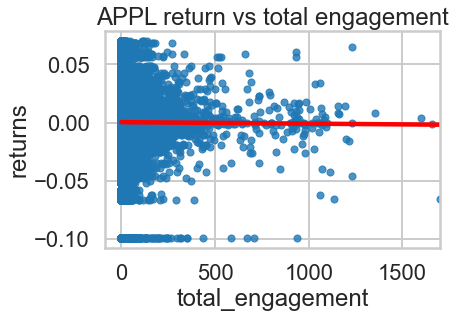

In [ ]:
# Visualize returns vs total engagement: APPL
return_vs_engage_AAPL = Tweet_vs_value[Tweet_vs_value['ticker_symbol'] =='AAPL']
sns.regplot(x='total_engagement', y="returns", data=return_vs_engage_AAPL, ci=None, x_jitter=.05, scatter_kws={"s": 50},line_kws={'color':'red'})
plt.title("APPL return vs total engagement")
plt.show()

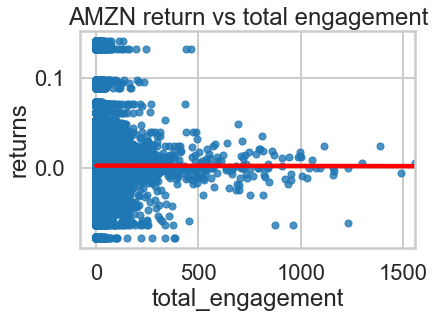

In [ ]:
# Visualize returns vs total engagement: AMZN
return_vs_engage_AMZN = Tweet_vs_value[Tweet_vs_value['ticker_symbol'] =='AMZN']
sns.regplot(x='total_engagement', y="returns", data=return_vs_engage_AMZN, ci=None, x_jitter=.05, scatter_kws={"s": 50},line_kws={'color':'red'})
plt.title("AMZN return vs total engagement")
plt.show()

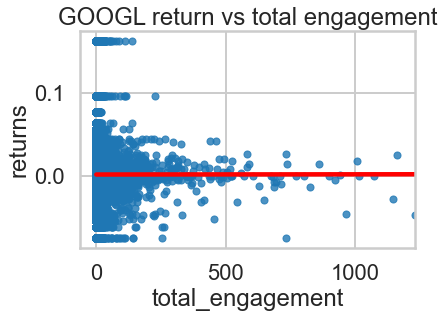

In [ ]:
# Visualize returns vs total engagement: GOOGL
return_vs_engage_GOOGL = Tweet_vs_value[Tweet_vs_value['ticker_symbol'] =='GOOGL']
sns.regplot(x='total_engagement', y="returns", data=return_vs_engage_GOOGL, ci=None, x_jitter=.05, scatter_kws={"s": 50},line_kws={'color':'red'})
plt.title("GOOGL return vs total engagement")
plt.show()

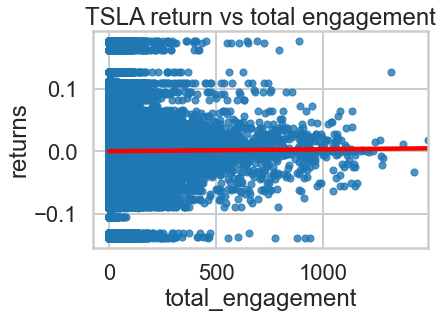

In [ ]:
# Visualize returns vs total engagement: TSLA
return_vs_engage_TSLA = Tweet_vs_value[Tweet_vs_value['ticker_symbol'] =='TSLA']
sns.regplot(x='total_engagement', y="returns", data=return_vs_engage_TSLA, ci=None, x_jitter=.05, scatter_kws={"s": 50},line_kws={'color':'red'})
plt.title("TSLA return vs total engagement")
plt.show()

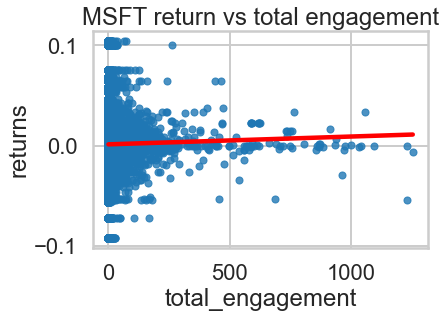

In [ ]:
# Visualize returns vs total engagement: MSFT
return_vs_engage_MSFT = Tweet_vs_value[Tweet_vs_value['ticker_symbol'] =='MSFT']
sns.regplot(x='total_engagement', y="returns", data=return_vs_engage_MSFT, ci=None, x_jitter=.05, scatter_kws={"s": 50},line_kws={'color':'red'})
plt.title("MSFT return vs total engagement")
plt.show()

# Conclusion

4 over 5 stocks do not move and only Microsoft stocks increased when total_engagement rises. We conclude that return trend is not necessarily influenced by total engagement alone. Since engagement can be positive, negative, or neutral, we will then add sentiment analysis to tweets and measure the correlation between return and total_engagement.